# **Customer Segmentation using Unsupervised Machine Learning in Python**

*PROJECT OUTLINE*
1. Problem Statement
2. Technologies and Tools used
3. Importing the Libraries
4. Load the Dataset
5. Data Preprocessing
6. Data Visualization and Analysis
7. Segmentation
8. Cluster Profiling
9. Insights & Business Recommendations

*PROBLEM STATEMENT*

In the era of data-driven decision-making, businesses are faced with the challenge of understanding and engaging with a diverse and rapidly growing customer base. Traditional one-size-fits-all marketing strategies are no longer effective, as customers exhibit varied behaviors, preferences, and purchasing patterns. Without a clear understanding of customer groups, businesses risk inefficient resource allocation, poor targeting, and reduced customer satisfaction.

This project addresses the need for **effective customer understanding by implementing an unsupervised machine learning-based customer segmentation model**. The objective is to group customers into distinct and meaningful segments based on key features such as demographics, spending habits, and engagement metrics. By using clustering algorithms like K-Means and dimensionality reduction techniques such as t-SNE, the model identifies patterns in customer data without the need for labeled examples.

**The resulting customer segments enable businesses to:**

*   Develop targeted marketing campaigns,
*   Personalize customer experiences,
*   Improve product and service offerings,
*   Enhance customer retention and loyalty.

This approach provides a scalable and data-driven solution to customer profiling, empowering organizations to make informed strategic decisions.

*TECHNOLOGIES AND TOOLS USED*

This project utilizes a range of data science and machine learning tools and technologies to perform effective customer segmentation. **Python** was the primary programming language due to its simplicity and rich ecosystem of data science libraries. **Pandas and NumPy** were used for data manipulation and numerical operations, while **Matplotlib and Seaborn** facilitated insightful data visualization. To prepare the data for modeling, preprocessing techniques such as label encoding and feature scaling were implemented using **scikit-learn**, a powerful machine learning library that also provided the core algorithms for clustering, including **K-Means and t-SNE** for dimensionality reduction and visualization. Additionally, **StandardScaler** was applied to normalize the dataset, ensuring optimal clustering performance. These technologies collectively enabled the development of a robust and interpretable customer segmentation model, supporting data-driven business strategies.

In [ ]:
# Installing neccessary libraries here
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

**IMPORTING THE LIBRARIES**

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

**LOAD THE DATASET**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving new.csv to new.csv


In [3]:
# Load the dataset
df = pd.read_csv('new.csv')

In [4]:
# View the first few rows
print("🔍 First 5 rows of the dataset:")
print(df.head())

🔍 First 5 rows of the dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCm

In [5]:
# To check the shape of the dataset we can use data.shape method.
df.shape

(2240, 29)

**DATA PREPROCESSING**

In [6]:
# To get the information of the dataset like checking the null values, count of values, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
#  checking the null values in the dataset

for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column Income contains 24 null values.


In [9]:
# Now, once we have the count of the null values , if we have the values are very less we can drop them as it will not affect the dataset much

df = df.dropna()
print("Total values in the dataset after removing the null values:", len(df))

Total values in the dataset after removing the null values: 2216


In [10]:
# To find the total number of unique values in each column we can use data.unique() method
df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [11]:
# dataset has a column Dt_Customer which contains the date column, we can convert into 3 columns i.e. day, month, year
# provides more granular and usable information for analysis and machine learning models.

parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [12]:
# we can now drop features like Z_CostContact, Z_Revenue, Dt_Customer
# when those features do not add meaningful information to the model

df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

**DATA VISUALIZATION AND ANALYSIS**

In [13]:
# categorize the columns of your dataset (df) based on their data types
# specifically identifying which columns are categorical (object) and which are numerical (float)

floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status']
['Income']


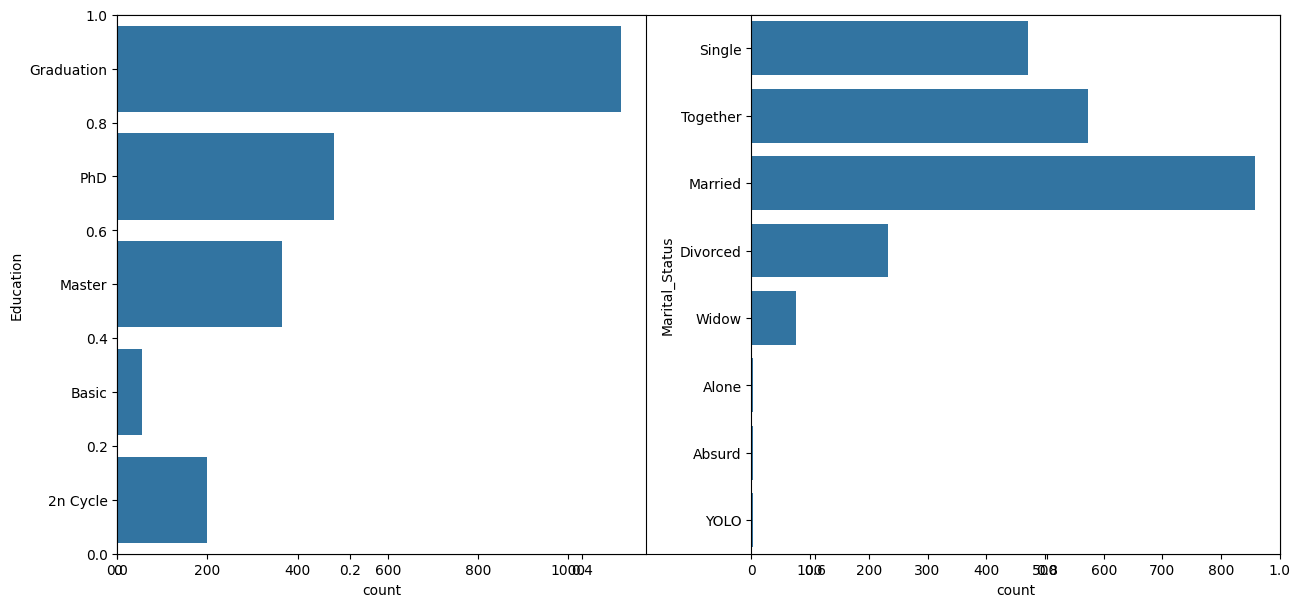

In [14]:
# generating count plots for all columns in the dataset that have the data type object
# To visualize the distribution of values in categorical columns

plt.subplots(figsize=(15, 7))
for i, col in enumerate(objects):
    plt.subplot(1, 2, i + 1)
    sb.countplot(df[col])
plt.show()

In [15]:
# to count how many times each unique category appears in the Marital_Status column
# It provides a frequency distribution of marital status among the customers.

df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


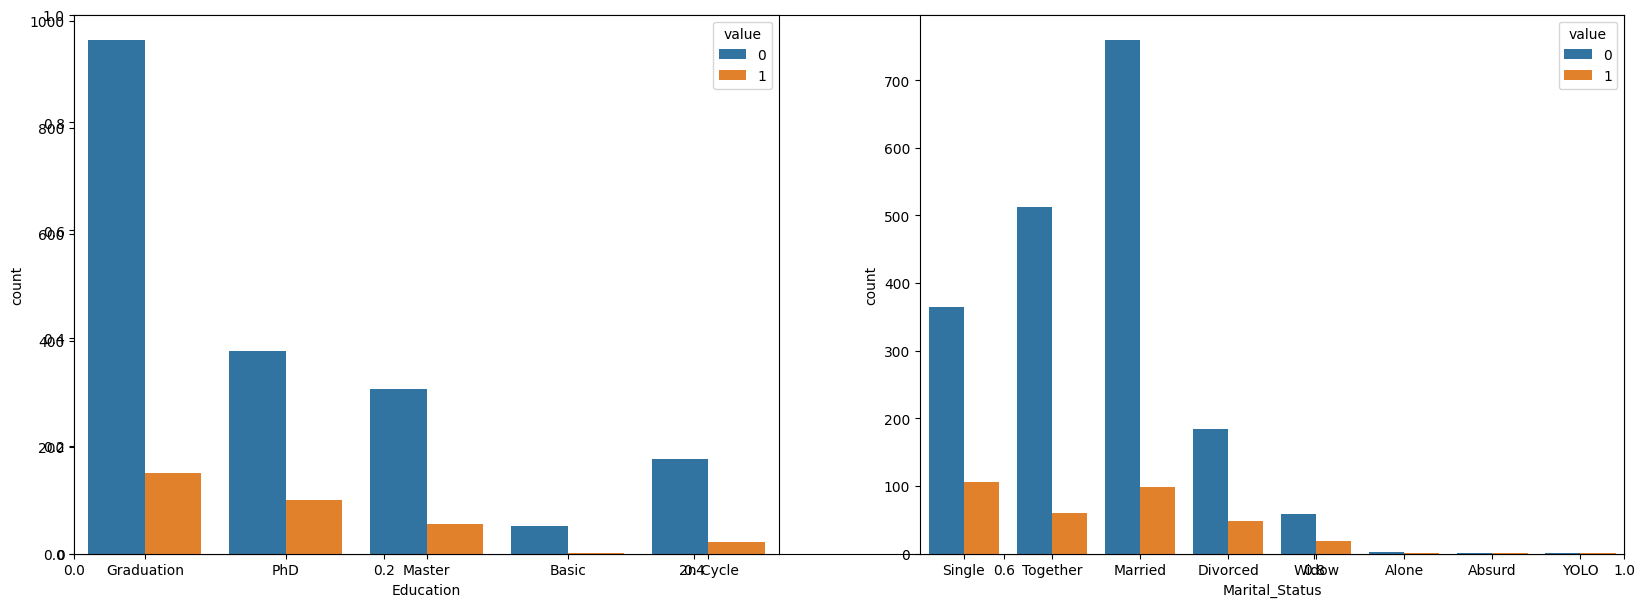

In [16]:
#comparison of the features with respect to the values of the responses.
#Discover useful patterns that can inform targeted marketing strategies.

plt.subplots(figsize=(20, 7))
for i, col in enumerate(objects):
    plt.subplot(1, 2, i + 1)

    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sb.countplot(x=col, hue='value', data=df_melted)
plt.show()

In [17]:
#Label Encoding is used to convert the categorical values into the numerical values so that model can understand it
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

*CORRELATION*

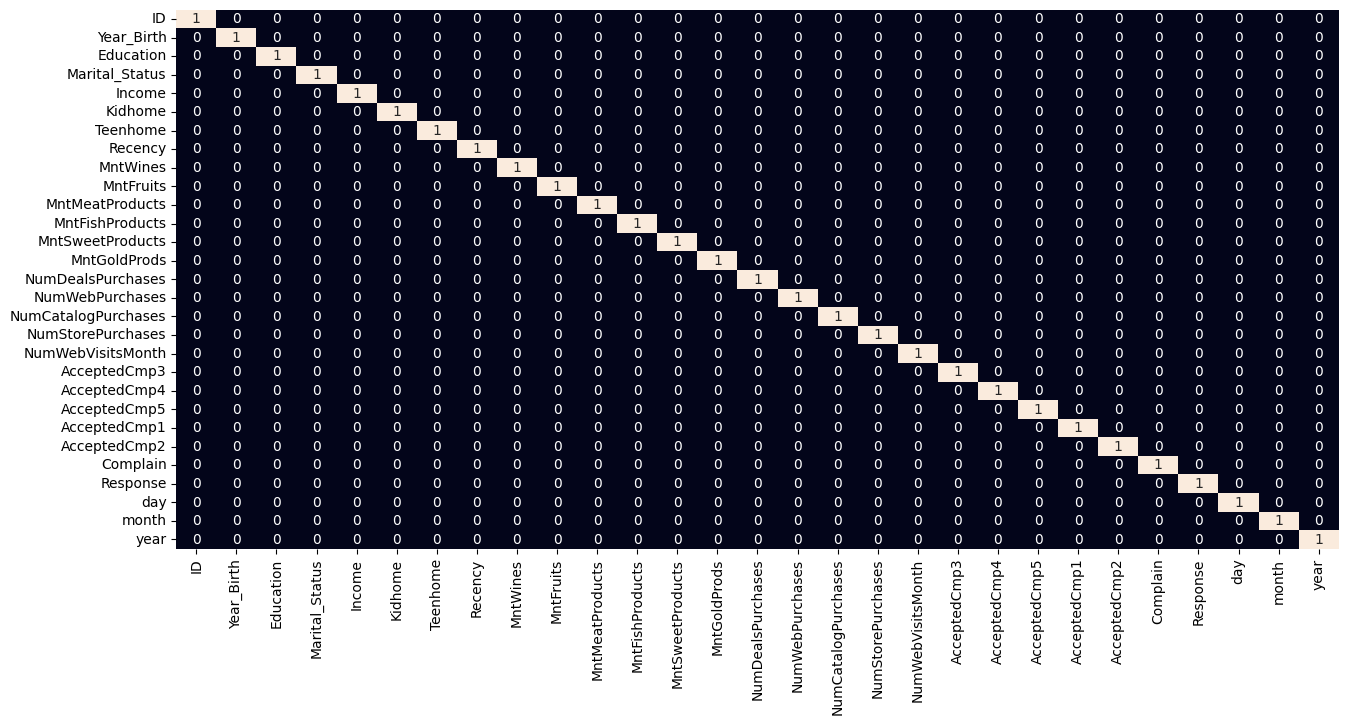

In [18]:
#Heatmap is the best way to visualize the correlation among the different features of dataset

plt.figure(figsize=(15, 7))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

*FEATURE SCALING*

In [19]:
#Standardization is the method of feature scaling
#It reduces the mean to ‘0’ and the standard deviation to ‘1’.

scaler = StandardScaler()
data = scaler.fit_transform(df)

**SEGMENTATION**

*TSNE VISUALIZATION*

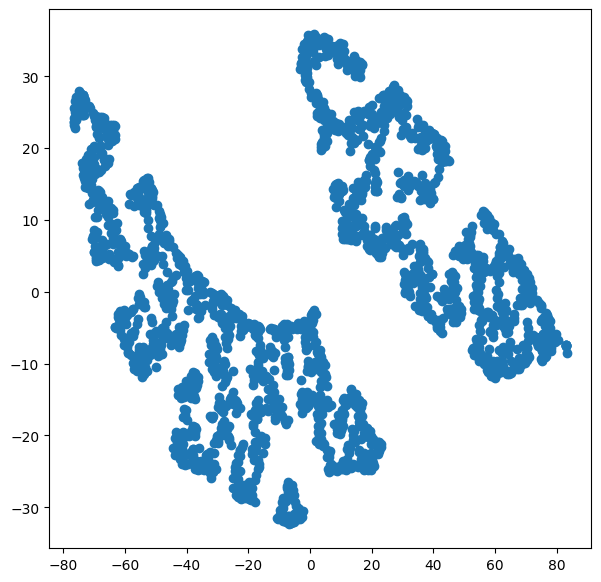

In [20]:
#reduce dimensionality and visualize clusters in a 2D plot, identifying possible clusters
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

*K-MEANS CLUSTERING*

In [21]:
# Determining Optimal Clusters Using the Elbow Method
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)

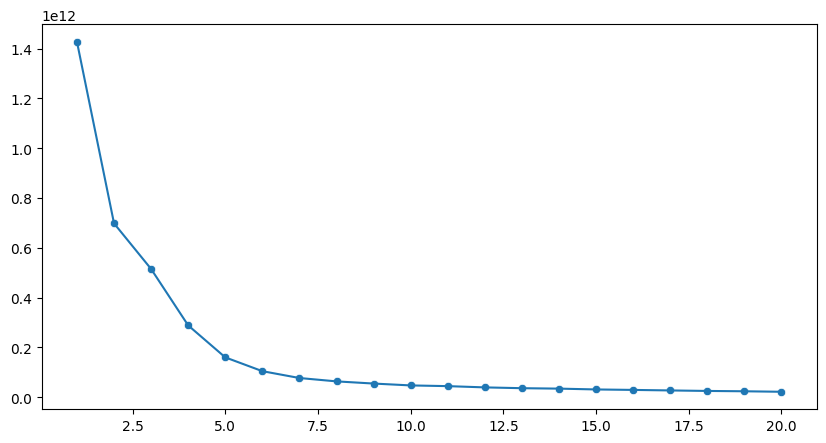

In [22]:
#Elbow Curve Visualization for Optimal Clusters
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(1, 21), y=error)
sb.scatterplot(x=range(1, 21), y=error)
plt.show()

In [23]:
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

*FINAL CLUSTERS*

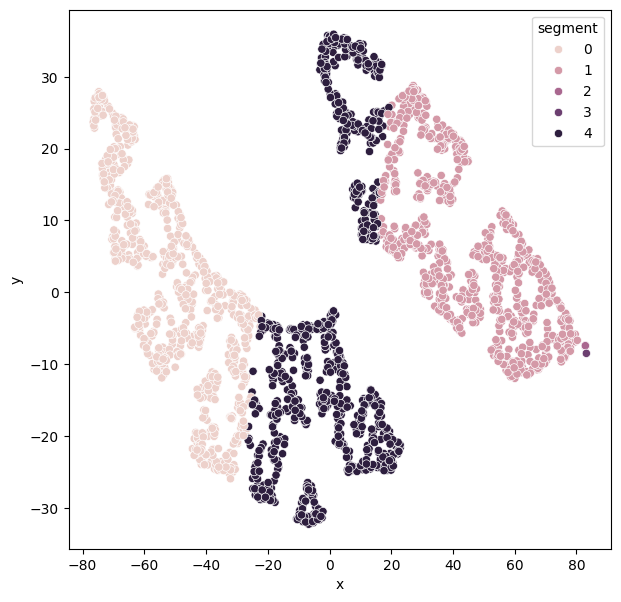

In [24]:
#Scatterplot for Visualizing Clusters
#The KMeans model was applied, and to visualize the resulting clusters with a scatter plot, showing clear customer segments based on purchasing behavior.

plt.figure(figsize=(7, 7))
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()

**CUSTOMER PROFILING**

We've assigned customers to clusters, now we can analyze the characteristics of each cluster.

In [25]:
df['cluster'] = segments
cluster_profile = df.groupby('cluster').mean()  # or use median()
print(cluster_profile)

                  ID   Year_Birth  Education  Marital_Status         Income  \
cluster                                                                       
0        5684.920723  1973.104312   2.159944        3.702364   27992.303199   
1        5739.694561  1967.283124   2.471409        3.722455   75510.658298   
2        5497.428571  1971.857143   3.285714        3.714286  158024.285714   
3        9432.000000  1977.000000   2.000000        5.000000  666666.000000   
4        5353.702073  1966.220207   2.532383        3.750000   51475.990933   

          Kidhome  Teenhome    Recency    MntWines  MntFruits  ...  \
cluster                                                        ...   
0        0.813630  0.308762  48.489569   29.390821   5.773296  ...   
1        0.093445  0.377964  48.963738  622.739191  56.688982  ...   
2        0.285714  0.285714  52.285714   29.000000   3.142857  ...   
3        1.000000  0.000000  23.000000    9.000000  14.000000  ...   
4        0.419689  0.80958

**INSIGHTS AND BUSSINESS RECOMMENDATIONS**

*INSIGHTS*

After performing customer segmentation using unsupervised machine learning, specifically K-Means Clustering on preprocessed customer data, the following insights were observed:

**Optimal Clusters Identified:**

Using the elbow method, the optimal number of customer segments was determined to be 6, based on the inertia (within-cluster sum of squares) analysis.

**Distinct Customer Profiles:**

Through cluster profiling, each segment revealed distinct behaviors and characteristics, such as:

*   High-income, high-spending customers
*   Low-income, low-engagement customers
*   Middle-income customers with varied purchasing habits
*   New or infrequent buyers

**Key Influencing Features:**

Features such as Income, Age, Spending on specific product categories, and Recency (days since last purchase) were found to be major differentiators among clusters.

**Effective Dimensionality Reduction:**

Using t-SNE and visualizations, clusters were clearly separated in 2D space, indicating meaningful segmentation.

*BUSSINESS RECOMMENDATIONS*

Based on the identified customer segments, here are actionable recommendations for business strategy:

📈 **1. Target High-Value Customers (Cluster X)**

->Customers with high income and frequent purchases.

->Offer premium products, early access to sales, and loyalty rewards.

->Run exclusive marketing campaigns tailored to their preferences.

🛒 **2. Engage Low-Spending Segments (Cluster Y)**

->These customers shop infrequently or spend less.

->Introduce budget-friendly bundles, discounts, and referral programs to increase engagement.

->Use email marketing with personalized recommendations.

🎯 **3. Convert One-Time Buyers**

->Identify new customers and send welcome offers, how-to guides, or follow-up emails.

->Recommend similar products based on first purchase.

🔁 **4. Retain At-Risk Customers**

->Customers who haven’t shopped recently (high recency).

->Use re-engagement campaigns, reminder emails, or seasonal promotions.

🔍 **5. Monitor Segment Movement Over Time**

->Regularly update clusters to track changes in customer behavior.

->Implement a dynamic segmentation system to adapt marketing and service strategies.